In [1]:
import numpy as np
import pylab as pl
import sklearn.cluster
#for clustering
#for pylab setup
import json
import os
import urllib
#for animation
import time, sys
from IPython.core.display import clear_output, display

pl.rcdefaults() 
pl.style.use('ggplot')
url = "https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json"

#response = urllib.request.urlopen(url)
#s = json.loads(response.read().decode('utf8'))
    #response.read())

#s['axes.edgecolor'] = 'white'
#pl.rcParams.update(s)
%pylab inline


Populating the interactive namespace from numpy and matplotlib


## generating random data:
## 2 gaussian distributions, differnt means, different stsndard deviations


In [ ]:
'''
for i in range(10,20):
    fig = pl.figure(figsize = (7,7))
    thisseed = 100+i
    np.random.seed(thisseed)
    k1s, k1m = np.random.rand()*5, random.rand()*10
    k1 = (k1s*np.random.randn(2, 100)+k1m).T
    k2s, k2m = np.random.rand()*5, random.rand()*10
    k2 = (k2s*np.random.randn(2, 100)+k2m).T
    pl.title("%d"%thisseed)
    pl.plot(k1[:,0], k1[:,1], 'o')
    pl.plot(k2[:,0], k2[:,1], 'o')

'''

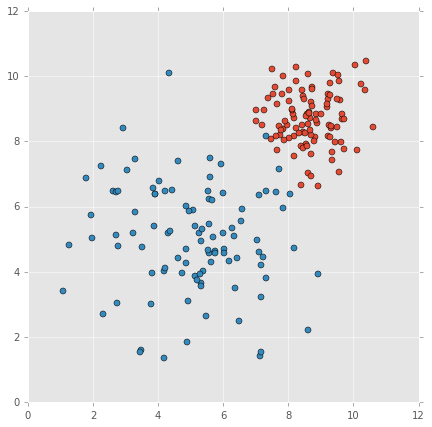

In [2]:
fig = pl.figure(figsize = (7,7))

np.random.seed(114)
k1s, k1m = np.random.rand()*5, random.rand()*10
k1 = (k1s*np.random.randn(2, 100)+k1m).T
k2s, k2m = np.random.rand()*5, random.rand()*10
k2 = (k2s*np.random.randn(2, 100)+k2m).T
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')


# 0.0 define a distance metric


In [3]:
#Eucledian distance
def dist (data, c):
    return np.sqrt((data[0]-c[0])**2 + (data[1]-c[1])**2)


# 0.1 define a convergence criterion

In [4]:
critv=1e-5
def convergence(new, old):
    return  (np.abs(new[0][0] - old[0][0] ) <= critv) * \
            (np.abs(new[0][1] - old[0][1] ) <= critv) * \
            (np.abs(new[1][0] - old[1][0] ) <= critv) * \
            (np.abs(new[1][1] - old[1][1] ) <= critv) 
   


# 1. choose 2 random starting points: random locations within the distribution


In [5]:
np.random.seed(777)
x0, y0 = (max(k1[:,0]) - (min(k1[:,0]) - 1)) * \
    np.random.rand(), (max(k1[:,1]) - (min(k1[:,1]) - 1)) * \
    np.random.rand()
x1, y1 = (max(k2[:,0]) - (min(k2[:,0]) - 1)) * \
    np.random.rand(), (max(k2[:,1]) - (min(k2[:,1]) - 1)) * \
    np.random.rand()

0.705383247144 1.46781681461 0.548497858711 4.49019035885


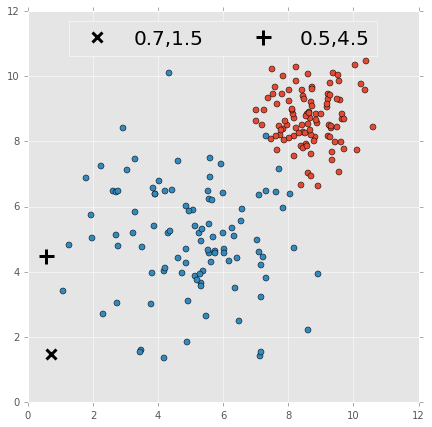

In [6]:
x_save = (x0,x1)
y_save = (y0,y1)

pl.figure(figsize = (7,7))
print (x0,y0,x1,y1)
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')

pl.plot([x0], [y0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(x0,y0))
pl.plot([x1], [y1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(x1,y1))
pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)


# 2. assign membership to each datapoint

In [7]:
l1 = np.zeros(len(k1), int)
for i,k in enumerate(k1):
    l1[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1

l2 = np.zeros(len(k2), int)
for i,k in enumerate(k2):
    l2[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1


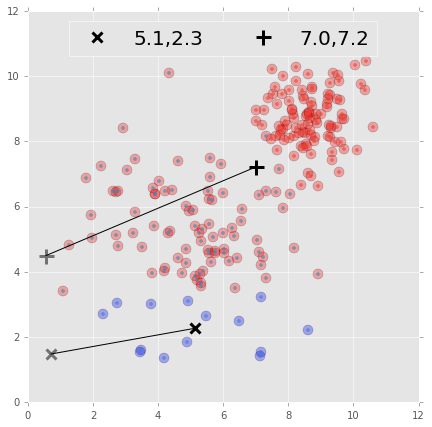

In [8]:
pl.figure(figsize = (7,7))


pl.plot(k1[l1==0][:,0], k1[l1==0][:,1], 'bo', ms=10, alpha = 0.3)
pl.plot(k2[l2==0][:,0], k2[l2==0][:,1], 'bo', ms=10, alpha = 0.3)
pl.plot(k1[l1==1][:,0], k1[l1==1][:,1], 'ro', ms=10, alpha = 0.3)
pl.plot(k2[l2==1][:,0], k2[l2==1][:,1], 'ro', ms=10, alpha = 0.3)
pl.plot(k1[:,0], k1[:,1], '.', alpha = 0.6)
pl.plot(k2[:,0], k2[:,1], '.', alpha = 0.6)

xnew0, ynew0 = np.mean(np.concatenate([k1[l1==0][:,0], 
                                       k2[l2==0][:,0]])), np.mean(np.concatenate([k1[l1==0][:,1], 
                                                                                  k2[l2==0][:,1]]))
xnew1, ynew1 = np.mean(np.concatenate([k1[l1==1][:,0], 
                                       k2[l2==1][:,0]])), np.mean(np.concatenate([k1[l1==1][:,1], 
                                                                                  k2[l2==1][:,1]]))
pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))

pl.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
pl.plot([x1], [y1], 'k+', ms = 15, mew=3, alpha=0.5)
pl.plot([x0, xnew0], [y0, ynew0], 'k-')
pl.plot([x1, xnew1], [y1, ynew1], 'k-')
pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)



# 3. recalculate center, reassign membership, iteratively til convergence

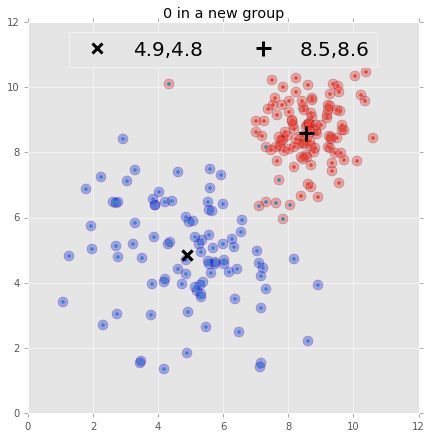

In [9]:
l1old = np.empty_like(l1)
l2old = np.empty_like(l2)
fig = pl.figure(figsize=(7,7))
ax = fig.add_subplot(111)
while not convergence([(xnew0, ynew0), (xnew1, ynew1)], [(x0, y0), (x1, y1)]):
    #print convergence([(xnew0, ynew0), (xnew1, ynew1)], [(x0, y0), (x1, y1)])
    ax.cla()
    x0 = xnew0
    x1 = xnew1
    y0 = ynew0
    y1 = ynew1
    
    l1 = np.zeros(len(k1), int)
    for i,k in enumerate(k1):
        l1[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
    l2 = np.zeros(len(k2), int)
    for i,k in enumerate(k2):
        l2[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
        
        
 
    ax.plot(k1[l1==0][:,0], k1[l1==0][:,1], 'bo', ms=10, alpha = 0.3)
    ax.plot(k2[l2==0][:,0], k2[l2==0][:,1], 'bo', ms=10, alpha = 0.3)
    ax.plot(k1[l1==1][:,0], k1[l1==1][:,1], 'ro', ms=10, alpha = 0.3)
    ax.plot(k2[l2==1][:,0], k2[l2==1][:,1], 'ro', ms=10, alpha = 0.3)
    ax.plot(k1[:,0], k1[:,1], '.')
    ax.plot(k2[:,0], k2[:,1], '.')

    xnew0, ynew0 = np.mean(np.concatenate([k1[l1==0][:,0], 
                                       k2[l2==0][:,0]])), np.mean(np.concatenate([k1[l1==0][:,1], 
                                                                                  k2[l2==0][:,1]]))
    xnew1, ynew1 = np.mean(np.concatenate([k1[l1==1][:,0], 
                                       k2[l2==1][:,0]])), np.mean(np.concatenate([k1[l1==1][:,1], 
                                                                                  k2[l2==1][:,1]]))
    ax.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
    ax.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))
    ax.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
    ax.plot([x1], [y1], 'k+', ms = 15, mew=3, alpha=0.5)
    ax.plot([x0, xnew0], [y0, ynew0], 'k-')
    ax.plot([x1, xnew1], [y1, ynew1], 'k-')

    pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)
    ax.set_title("%d in a new group"%(sum(~(
                    l1old == l1))+sum(~(l2old == l2))))
    l1old = l1
    l2old = l2
    time.sleep(1)
    clear_output()
    display(fig)
    time.sleep(0.1)
    
clear_output()

In [10]:
print ("the original centers were:  %.1f %.1f, %.1f %.1f"\
       %(x_save[0], y_save[0], x_save[1], y_save[1]))
print ("the new K-means center are: %.1f %.1f, %.1f %.1f"\
       %(xnew0, ynew0, xnew1, ynew1))




the original centers were:  0.7 1.5, 0.5 4.5
the new K-means center are: 4.9 4.8, 8.5 8.6


# 4. VALIDATE: restart from a different set of initial centers

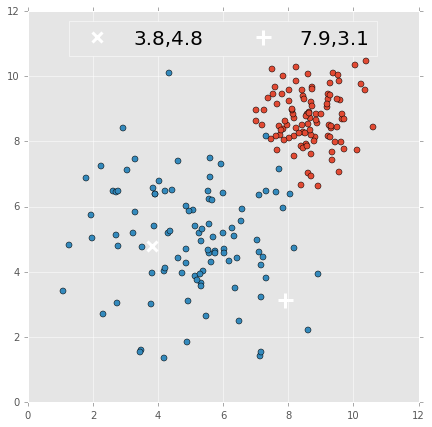

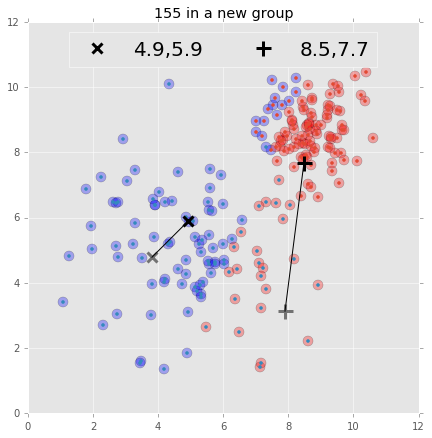

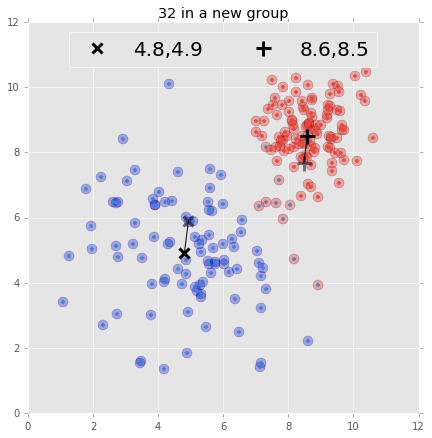

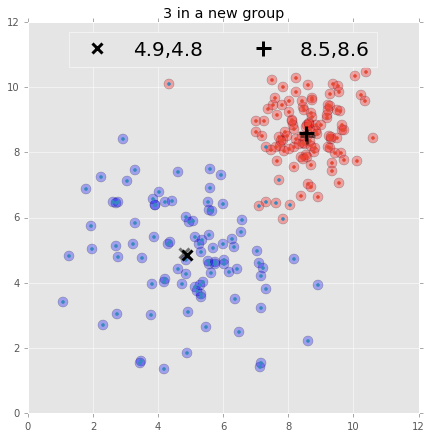

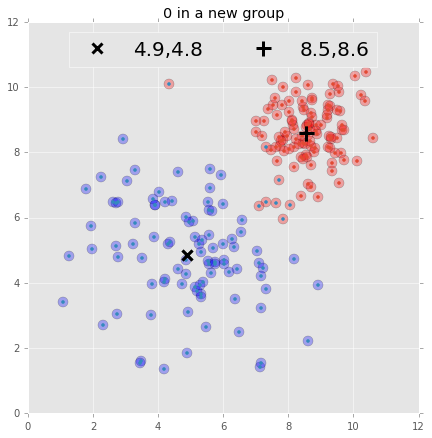

In [11]:
np.random.seed(1999)
xnew0, ynew0 = (max(k1[:,0]) - (min(k1[:,0]) - 1)) * \
    np.random.rand(), (max(k1[:,1]) - (min(k1[:,1]) - 1)) * \
    np.random.rand()
xnew1, ynew1 = (max(k2[:,0]) - (min(k2[:,0]) - 1)) * \
    np.random.rand(), (max(k2[:,1]) - (min(k2[:,1]) - 1)) * \
    np.random.rand()
l1old = np.empty_like(l1)
l2old = np.empty_like(l2)
l1 = np.empty_like(l1)
l2 = np.empty_like(l2)
x_save = (xnew0, xnew1)
y_save = (ynew0, ynew1)
pl.figure(figsize = (7,7))
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')

pl.plot([xnew0], [ynew0], 'wx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0, ynew0))
pl.plot([xnew1], [ynew1], 'w+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1, ynew1))
pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)
while not convergence([(xnew0, ynew0), (xnew1, ynew1)], [(x0, y0), (x1, y1)]):
    pl.figure(figsize=(7,7))
    x0 = xnew0
    x1 = xnew1
    y0 = ynew0
    y1 = ynew1
    
    l1 = np.zeros(len(k1), int)
    for i,k in enumerate(k1):
        l1[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
    l2 = np.zeros(len(k2), int)
    for i,k in enumerate(k2):
        l2[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
        
        

    pl.plot(k1[l1==0][:,0], k1[l1==0][:,1], 'bo', ms=10, alpha = 0.3)
    pl.plot(k2[l2==0][:,0], k2[l2==0][:,1], 'bo', ms=10, alpha = 0.3)
    pl.plot(k1[l1==1][:,0], k1[l1==1][:,1], 'ro', ms=10, alpha = 0.3)
    pl.plot(k2[l2==1][:,0], k2[l2==1][:,1], 'ro', ms=10, alpha = 0.3)
    pl.plot(k1[:,0], k1[:,1], '.')
    pl.plot(k2[:,0], k2[:,1], '.')
    
    pl.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
    pl.plot([x1], [y1], 'k+', ms = 15, mew=3, alpha=0.5)
    xnew0, ynew0 = np.mean(np.concatenate([k1[l1==0][:,0], 
                                       k2[l2==0][:,0]])), np.mean(np.concatenate([k1[l1==0][:,1], 
                                                                                  k2[l2==0][:,1]]))
    xnew1, ynew1 = np.mean(np.concatenate([k1[l1==1][:,0], 
                                       k2[l2==1][:,0]])), np.mean(np.concatenate([k1[l1==1][:,1], 
                                                                                  k2[l2==1][:,1]]))
    pl.plot([xnew0], [ynew0], 'kx',  ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
    pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))
    pl.plot([x0, xnew0], [y0, ynew0], 'k-')
    pl.plot([x1, xnew1], [y1, ynew1], 'k-')
    pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)
    pl.title("%d in a new group"%(sum(~(
                    l1old == l1))+sum(~(l2old == l2))))
    l1old = l1
    l2old = l2

  

In [ ]:
print ("the original centers were:  %.1f %.1f, %.1f %.1f"\
       %(x_save[0], y_save[0], x_save[1], y_save[1]))
print ("the new K-means center are: %.1f %.1f, %.1f %.1f"\
       %(xnew0, ynew0, xnew1, ynew1))

